üslü indeksleme, daha önce gördüğümüz basit indekslemeye benzer, ancak tek skalerlerin yerine indeks dizilerini aktarırız. Bu, bir dizinin değerlerinin karmaşık alt kümelerine çok hızlı bir şekilde erişmemize ve bunları değiştirmemize olanak tanır.
​

In [6]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Üç farklı öğeye erişmek istediğimizi varsayalım. Bunu şu şekilde yapabiliriz:

In [7]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternatif olarak, aynı sonucu elde etmek için tek bir listeyi veya dizin dizisini iletebiliriz:

In [8]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [9]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [10]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

# Örnek: Rastgele Noktaların Seçilmesi
Fantezi indekslemenin yaygın bir kullanımı, bir matristen satırların alt kümelerinin seçilmesidir. Örneğin, iki boyutlu bir normal dağılımdan çizilen aşağıdaki noktalar gibi, D boyutlarında N noktayı temsil eden bir N'ye D matrisimiz olabilir:

In [12]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

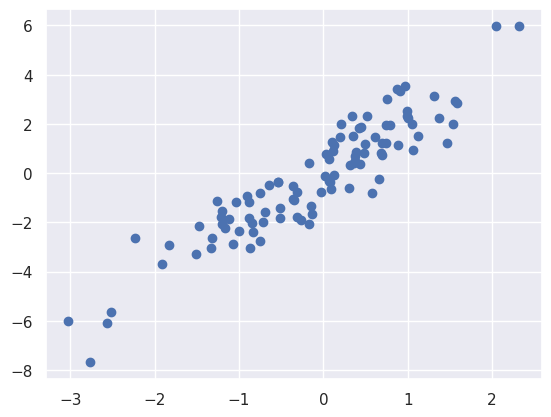

In [14]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1]);

20 rastgele nokta seçmek için süslü indekslemeyi kullanalım. Bunu ilk önce tekrarı olmayan 20 rastgele indeks seçerek yapacağız ve bu indeksleri orijinal dizinin bir bölümünü seçmek için kullanacağız:

In [16]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 9, 77, 63, 75, 81, 41, 50, 20, 12, 56, 78, 83, 76, 58, 36, 86, 27,
       65, 97, 73])

In [17]:
selection = X[indices]
selection.shape

(20, 2)

Şimdi hangi noktaların seçildiğini görmek için seçilen noktaların konumlarına büyük daireler çizelim:

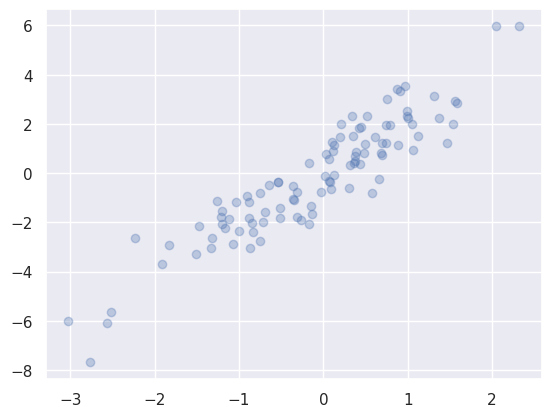

In [20]:
plt.scatter(X[:,0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200)